# Project: football players analysis

## (1) What are the most factors that affect the overall ability of players?
## (2) Is left foot preferred people suitable for playing football?
## (3) How is age correlated with ability of players?

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
sns.set(style="darkgrid", font="SimHei", font_scale=1.5, rc={"axes.unicode_minus": False})
warnings.filterwarnings("ignore")

## Load the data

In [4]:
data = pd.read_csv("data.csv")
print(data.shape)
data.head() # this will show 5 rows
# data.sample() #this will show one random row from data

(18207, 89)


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
columns = ["Name", "Age", "Nationality", "Overall", "Potential", "Club", "Value", "Wage", "Preferred Foot",
           "Position", "Jersey Number", "Joined", "Height", "Weight", "Crossing", "Finishing",
           "HeadingAccuracy", "ShortPassing", "Volleys", "Dribbling", "Curve", "FKAccuracy", "LongPassing",
           "BallControl", "Acceleration", "SprintSpeed", "Agility", "Reactions", "Balance", "ShotPower",
           "Jumping", "Stamina", "Strength", "LongShots", "Aggression", "Interceptions",
           "Positioning", "Vision", "Penalties", "Composure", "Marking", "StandingTackle", "SlidingTackle", 
           "GKDiving", "GKHandling", "GKKicking", "GKPositioning", "GKReflexes", "Release Clause"]
# only select columns we want
data = pd.read_csv("data.csv", usecols=columns)
data.head(2)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,Position,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,RF,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,ST,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M


In [6]:
# set the maximum displayed columns to be 100 columns
pd.set_option("max_column", 100)
data.head(2)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,Position,Jersey Number,Joined,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,RF,10.0,"Jul 1, 2004",5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,ST,7.0,"Jul 10, 2018",6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M


## Data cleaning

In [7]:
# from data.info() we can see how many values are not null in each columns and their data type, memory usage 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 49 columns):
Name               18207 non-null object
Age                18207 non-null int64
Nationality        18207 non-null object
Overall            18207 non-null int64
Potential          18207 non-null int64
Club               17966 non-null object
Value              18207 non-null object
Wage               18207 non-null object
Preferred Foot     18159 non-null object
Position           18147 non-null object
Jersey Number      18147 non-null float64
Joined             16654 non-null object
Height             18159 non-null object
Weight             18159 non-null object
Crossing           18159 non-null float64
Finishing          18159 non-null float64
HeadingAccuracy    18159 non-null float64
ShortPassing       18159 non-null float64
Volleys            18159 non-null float64
Dribbling          18159 non-null float64
Curve              18159 non-null float64
FKAccuracy         18159 

In [8]:
# sum the total number of missing value in each column
# if the percent of missing values < 10%, we just drop it
data.isnull().sum(axis=0) # axis=0 will count missing rows in each column

Name                  0
Age                   0
Nationality           0
Overall               0
Potential             0
Club                241
Value                 0
Wage                  0
Preferred Foot       48
Position             60
Jersey Number        60
Joined             1553
Height               48
Weight               48
Crossing             48
Finishing            48
HeadingAccuracy      48
ShortPassing         48
Volleys              48
Dribbling            48
Curve                48
FKAccuracy           48
LongPassing          48
BallControl          48
Acceleration         48
SprintSpeed          48
Agility              48
Reactions            48
Balance              48
ShotPower            48
Jumping              48
Stamina              48
Strength             48
LongShots            48
Aggression           48
Interceptions        48
Positioning          48
Vision               48
Penalties            48
Composure            48
Marking              48
StandingTackle  

In [9]:
# delete all the rows that contain null value
data.dropna(axis=0, inplace=True)
# data.isnull().sum(axis=0)

In [10]:
# use describe to check whether we have abnormal values (e.g. large std?)
data.describe()

,Age,Overall,Potential,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000
mean,25.226221,66.162771,71.140900,19.657213,49.596167,45.257766,52.120711,58.543952,42.678363,55.104729,47.001562,42.755453,52.635703,58.136274,64.442168,64.548819,63.380701,61.781049,63.902842,55.250916,65.120591,63.160007,65.313946,46.835366,55.924353,46.792285,49.709788,53.299525,48.331911,58.558673,47.328967,47.776302,45.751607,16.747521,16.515712,16.355765,16.503936,16.837409
std,4.716588,7.008236,6.151409,16.054811,18.453544,19.538677,17.471305,14.810741,17.740778,19.008604,18.467168,17.547492,15.392385,16.785044,15.043344,14.758874,14.811186,9.119762,14.193035,17.308688,11.856488,16.064355,12.530695,19.334622,17.422401,20.742177,19.611146,14.171630,15.767045,11.539260,19.937220,21.681809,21.295201,17.832273,17.033907,16.615668,17.151713,18.090985
min,16.000000,46.000000,48.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,67.000000,8.000000,38.000000,30.000000,44.000000,53.000000,30.000000,48.000000,34.000000,30.000000,43.000000,54.000000,56.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,32.000000,44.000000,26.000000,38.000000,44.000000,38.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,71.000000,17.000000,54.000000,48.000000,55.000000,62.000000,43.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,66.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,59.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,29.000000,71.000000,75.000000,26.000000,64.000000,61.000000,64.000000,68.000000,56.000000,68.000000,62.000000,56.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,95.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


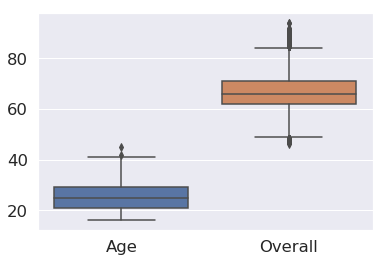

In [11]:
# boxplot also gives hint whether data contains abnormal values
# abnormal value: value < q1-1.5IQR or value > q3+1.5IQR (IQR=q3-q1)   
sns.boxplot(data=data[["Age", "Overall"]])

In [12]:
# check whether we have duplicate data, and delete duplicates
data.duplicated().sum()
data.drop_duplicates(inplace=True)

## Data analysis

In [13]:
# height data transform: 1feet == 30.48cm; 1inch=2.54cm
def tran_height(height):
    v = height.split("'") #after split, the number is still a string
    return int(v[0])*30.48+int(v[1])*2.54

# weight data transform: 1 lbs = 0.45kg
def tran_weight(weight):
    v = int(weight.replace("lbs", ""))
    return v*0.45
data["Height"] = data["Height"].apply(tran_height)
data["Weight"] = data["Weight"].apply(tran_weight)

In [14]:
data.head(2)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,Position,Jersey Number,Joined,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,RF,10.0,"Jul 1, 2004",170.18,71.55,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,ST,7.0,"Jul 10, 2018",187.96,82.35,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M


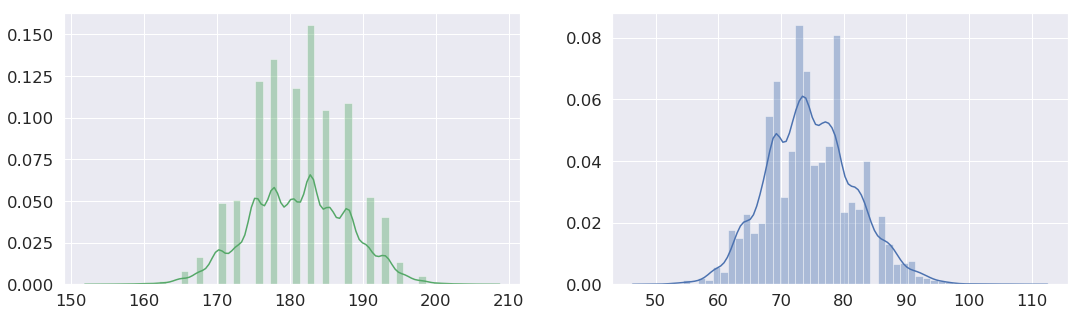

In [15]:
#plt.subplots() is a function that returns a tuple containing a figure and axes object(s).
# you can also write "fig, ax = plt.subplots(1,2)", then "ax=ax[0]", "ax=ax[1]" 
fig, [ax1, ax2] = plt.subplots(1, 2) # (1, 2) means (nrows=1, ncols=2)
fig.set_size_inches((18, 5))
sns.distplot(data[["Height"]], bins=50, ax=ax1, color="g")
sns.distplot(data[["Weight"]], bins=50, ax=ax2)

### Are left foot preferred players suitable for football? 

#### (1) quantity comparison between left and right foot preferred players

In [16]:
# value_counts will return a series containing counts of unique values
number = data["Preferred Foot"].value_counts()
print(number)

Right    12823
Left      3820
Name: Preferred Foot, dtype: int64


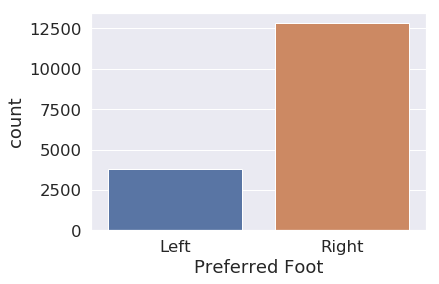

In [17]:
sns.countplot(x="Preferred Foot", data=data)

#### (2) overall competent comparison beteeen left and right foot preferred players

Preferred Foot
Left     66.740838
Right    65.990564
Name: Overall, dtype: float64


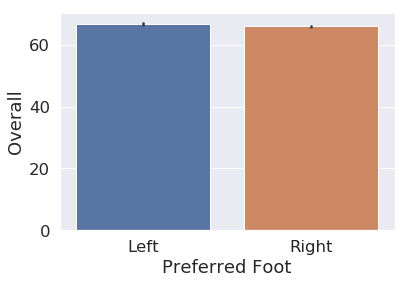

In [18]:
print(data.groupby("Preferred Foot")["Overall"].mean())
sns.barplot(x="Preferred Foot", y="Overall", data=data)

#### (3) overall competent comparison among different positions

In [19]:
t = data.groupby(["Preferred Foot", "Position"]).size()
t = t.unstack() # transform columns to be rows
t

Position,CAM,CB,CDM,CF,CM,GK,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
Preferred Foot,,,,,,,,,,,,,,,,,,,,,,,,,,,
Left,232,313,117,16,226,193,8,1071,244,86,45,3,372,27,98,65,9,14,31,35,22,5,220,30,79,3,256
Right,645,1333,756,50,1050,1707,12,152,351,267,179,12,640,157,240,11,12,1185,584,320,206,8,802,149,246,81,1668


In [20]:
# remove the values which are less than 50, too small number is not good for statistics comparison
t[t<50] = np.NaN
t.dropna(axis=1, inplace=True)
display(t)

Position,CAM,CB,CDM,CM,GK,LB,LCB,LCM,LM,LW,RM,RW,ST
Preferred Foot,,,,,,,,,,,,,
Left,232,313,117,226,193,1071,244,86,372,98,220,79,256
Right,645,1333,756,1050,1707,152,351,267,640,240,802,246,1668


In [21]:
t2 = data[data["Position"].isin(t.columns)]
t2.head(2)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,Position,Jersey Number,Joined,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,ST,7.0,"Jul 10, 2018",187.96,82.35,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,LW,10.0,"Aug 3, 2017",175.26,67.50,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M


Preferred Foot  Position
Left            CAM         68.021552
                CB          65.725240
                CDM         66.068376
                CM          65.407080
                GK          66.233161
                LB          66.095238
                LCB         69.168033
                LCM         70.430233
                LM          65.032258
                LW          65.102041
                RM          68.604545
                RW          70.101266
                ST          66.328125
Right           CAM         66.286822
                CB          64.711178
                CDM         66.216931
                CM          63.132381
                GK          64.263035
                LB          64.460526
                LCB         69.353276
                LCM         69.082397
                LM          67.520313
                LW          67.154167
                RM          65.799252
                RW          65.524390
                ST       

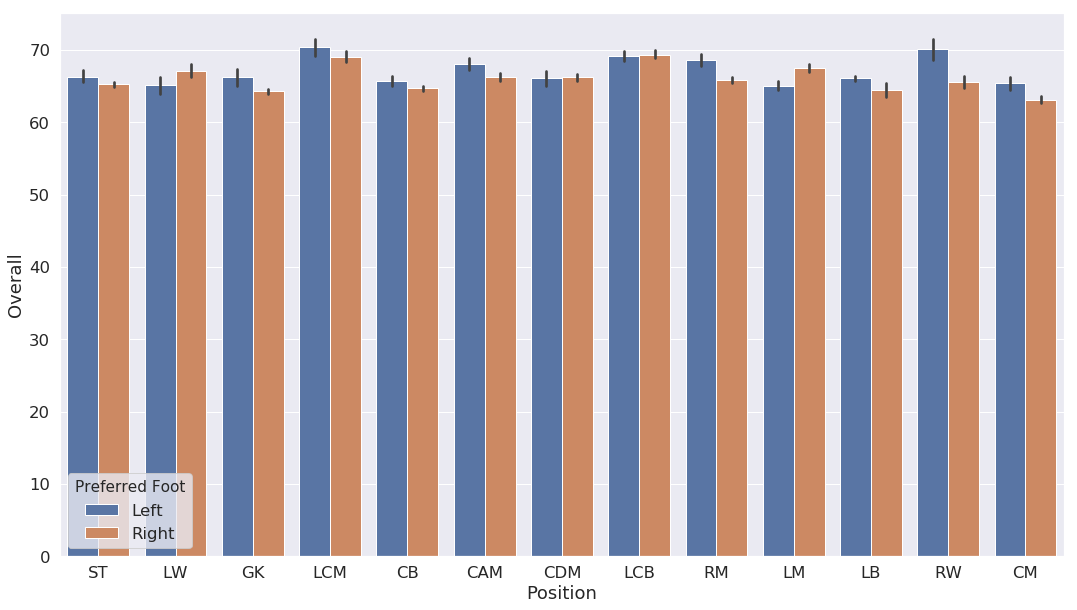

In [22]:
print(t2.groupby(["Preferred Foot", "Position"])["Overall"].mean())
plt.figure(figsize=(18, 10))
# group by two variables: position and preferred foot
sns.barplot(x="Position", y="Overall", hue="Preferred Foot", hue_order=["Left", "Right"], data=t2)

#### From results above, in "RW" position, it seems left preferred foot players has significant higher overall scores.

### Which club/country has higher overall scores players? (top10)

,Club,mean,count
0,Juventus,82.280000,25
1,Napoli,80.041667,24
2,Inter,79.619048,21
3,Real Madrid,78.242424,33
4,FC Barcelona,78.030303,33
5,Milan,77.541667,24
6,Paris Saint-Germain,77.433333,30
7,Roma,77.400000,25
8,Manchester United,77.242424,33
9,SL Benfica,77.074074,27


[Text(0, 0, 'Juventus'),
 Text(0, 0, 'Napoli'),
 Text(0, 0, 'Inter'),
 Text(0, 0, 'Real Madrid'),
 Text(0, 0, 'FC Barcelona'),
 Text(0, 0, 'Milan'),
 Text(0, 0, 'Paris Saint-Germain'),
 Text(0, 0, 'Roma'),
 Text(0, 0, 'Manchester United'),
 Text(0, 0, 'SL Benfica')]

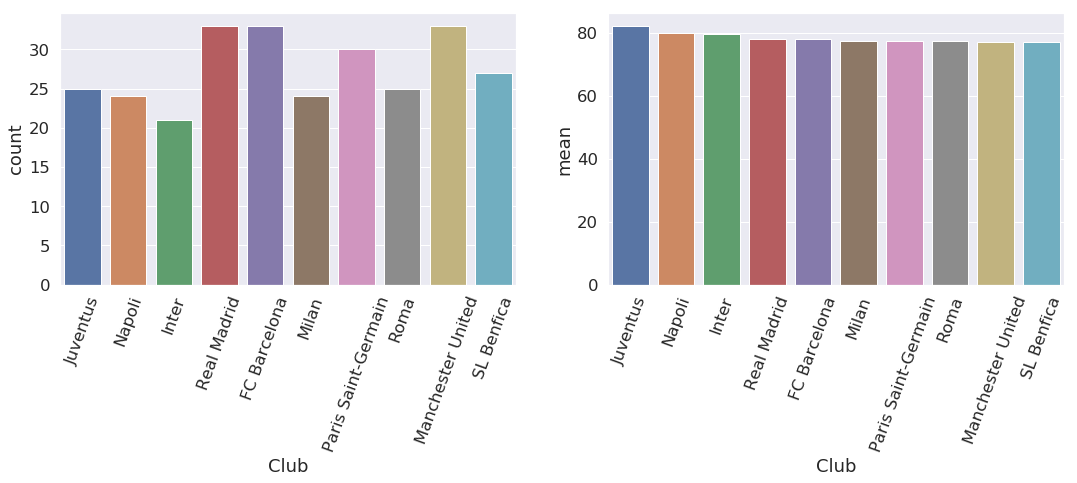

In [23]:
r = data.groupby("Club")["Overall"].agg(["mean", "count"]) # r index is "Club", column name is "mean" and "count"
r = r[r["count"]>=20].sort_values("mean", ascending=False).head(10)
r = r.reset_index() # let index "club" to be column name
display(r)
fig, ax = plt.subplots(1, 2)
fig.set_size_inches((18, 5))
count=sns.barplot(x="Club", y="count", ax=ax[0], data=r)
count.set_xticklabels(count.get_xticklabels(), rotation=70)
mean=sns.barplot(x="Club", y="mean", ax=ax[1], data=r)
mean.set_xticklabels(mean.get_xticklabels(), rotation=70)

,Nationality,mean,count
0,Portugal,71.406897,290
1,Brazil,71.251269,788
2,Egypt,71.000000,20
3,Uruguay,70.443609,133
4,Algeria,70.392857,56
5,Peru,70.384615,26
6,Ukraine,70.347222,72
7,Spain,69.733060,974
8,Morocco,69.721519,79
9,Slovenia,69.666667,48


[Text(0, 0, 'Portugal'),
 Text(0, 0, 'Brazil'),
 Text(0, 0, 'Egypt'),
 Text(0, 0, 'Uruguay'),
 Text(0, 0, 'Algeria'),
 Text(0, 0, 'Peru'),
 Text(0, 0, 'Ukraine'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Morocco'),
 Text(0, 0, 'Slovenia')]

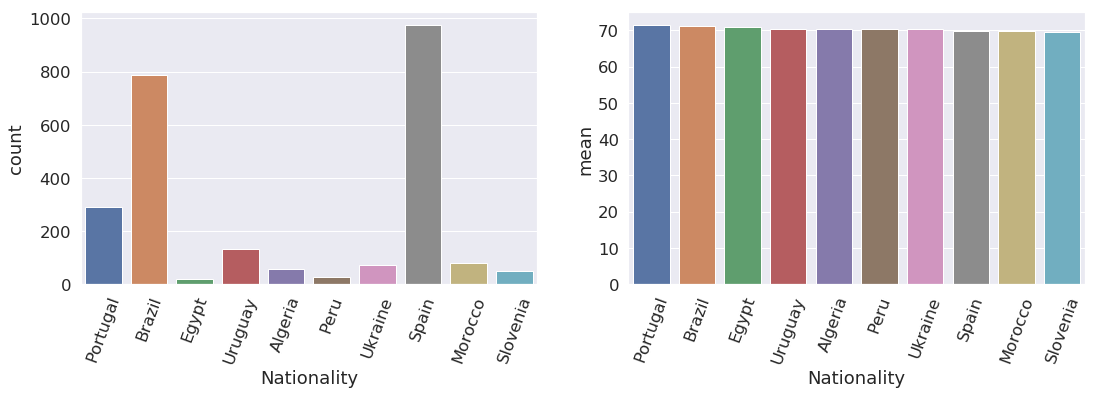

In [24]:
r = data.groupby("Nationality")["Overall"].agg(["mean", "count"]) # r index is "Club", column name is "mean" and "count"
r = r[r["count"]>=20].sort_values("mean", ascending=False).head(10)
r = r.reset_index() # let index "club" to be column name
display(r)
fig, ax = plt.subplots(1, 2)
fig.set_size_inches((18, 5))
count=sns.barplot(x="Nationality", y="count", ax=ax[0], data=r)
count.set_xticklabels(count.get_xticklabels(), rotation=70)
mean=sns.barplot(x="Nationality", y="mean", ax=ax[1], data=r)
mean.set_xticklabels(mean.get_xticklabels(), rotation=70)

In [25]:
data.head(10)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,Position,Jersey Number,Joined,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,RF,10.0,"Jul 1, 2004",170.18,71.55,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,ST,7.0,"Jul 10, 2018",187.96,82.35,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,LW,10.0,"Aug 3, 2017",175.26,67.50,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,GK,1.0,"Jul 1, 2011",193.04,75.60,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,RCM,7.0,"Aug 30, 2015",180.34,69.30,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,E. Hazard,27,Belgium,91,91,Chelsea,€93M,€340K,Right,LF,10.0,"Jul 1, 2012",172.72,73.35,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,L. Modrić,32,Croatia,91,91,Real Madrid,€67M,€420K,Right,RCM,10.0,"Aug 1, 2012",172.72,65.70,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,L. Suárez,31,Uruguay,91,91,FC Barcelona,€80M,€455K,Right,RS,9.0,"Jul 11, 2014",182.88,85.50,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,86.0,75.0,82.0,92.0,83.0,86.0,69.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,Sergio Ramos,32,Spain,91,91,Real Madrid,€51M,€380K,Right,RCB,15.0,"Aug 1, 2005",182.88,81.45,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,J. Oblak,25,Slovenia,90,93,Atlético Madrid,€68M,€94K,Right,GK,1.0,"Jul 16, 2014",187.96,86.40,13.0,11.0,15.0,29.0,13.0,12.0,13.0,14.0,26.0,16.0,43.0,60.0,67.0,86.0,49.0,22.0,76.0,41.0,78.0,12.0,34.0,19.0,11.0,70.0,11.0,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


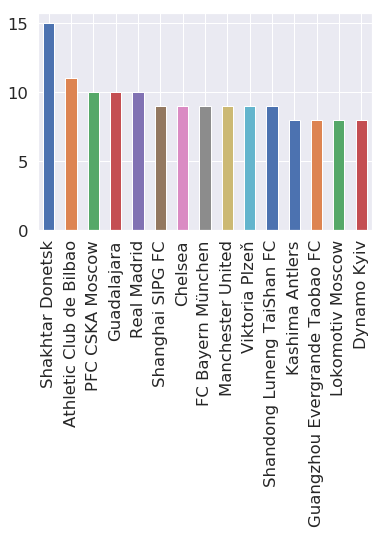

In [26]:
t = pd.to_datetime(data["Joined"])
t = t.astype(np.str)
join_year = t.apply(lambda item: int(item.split("-")[0]))
over_five_year = (2018-join_year)>=5 # here we get true or false boolean for each row
t2 = data[over_five_year] # here we get datafram
t2 = t2["Club"].value_counts() # this will get descending order by counts
# display(t2)
t2 = t2.iloc[:15] # you can also use t2[:15]
t2.plot(kind="bar")

### Is birth date associated with being a football player?

In [27]:
data2 = pd.read_csv("wc2018-players.csv")
data2.head()

,Team,#,Pos.,FIFA Popular Name,Birth Date,Shirt Name,Club,Height,Weight
0,Argentina,3,DF,TAGLIAFICO Nicolas,31.08.1992,TAGLIAFICO,AFC Ajax (NED),169,65
1,Argentina,22,MF,PAVON Cristian,21.01.1996,PAVÓN,CA Boca Juniors (ARG),169,65
2,Argentina,15,MF,LANZINI Manuel,15.02.1993,LANZINI,West Ham United FC (ENG),167,66
3,Argentina,18,DF,SALVIO Eduardo,13.07.1990,SALVIO,SL Benfica (POR),167,69
4,Argentina,10,FW,MESSI Lionel,24.06.1987,MESSI,FC Barcelona (ESP),170,72


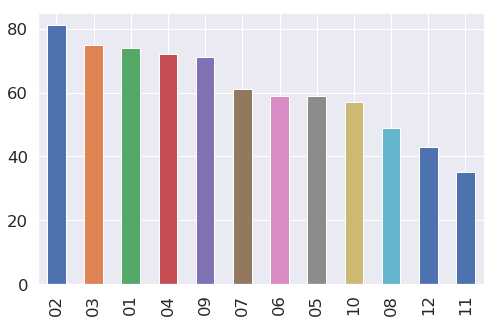

In [28]:
month = data2["Birth Date"].apply(lambda item: str(item).split(".")[1])
plt.figure(figsize=(8, 5))
month.value_counts().plot(kind="bar")

In [29]:
# change "Value", "Wage" and "Release Clause" to be numeric and the same unit
def to_numeric(item):
    item = item.replace("€", "")
    value = float(item[:-1])
    if item[-1] == "M":
        value *= 1000
    return value
data["Value"] = data["Value"].apply(to_numeric)
data["Wage"] = data["Wage"].apply(to_numeric)
data["Release Clause"] = data["Release Clause"].apply(to_numeric)

In [30]:
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,Position,Jersey Number,Joined,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,RF,10.0,"Jul 1, 2004",170.18,71.55,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,ST,7.0,"Jul 10, 2018",187.96,82.35,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,LW,10.0,"Aug 3, 2017",175.26,67.50,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100.0
3,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,GK,1.0,"Jul 1, 2011",193.04,75.60,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,RCM,7.0,"Aug 30, 2015",180.34,69.30,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400.0


### Which factors has bigger affect on "overall" ability of players (calculate correlation)

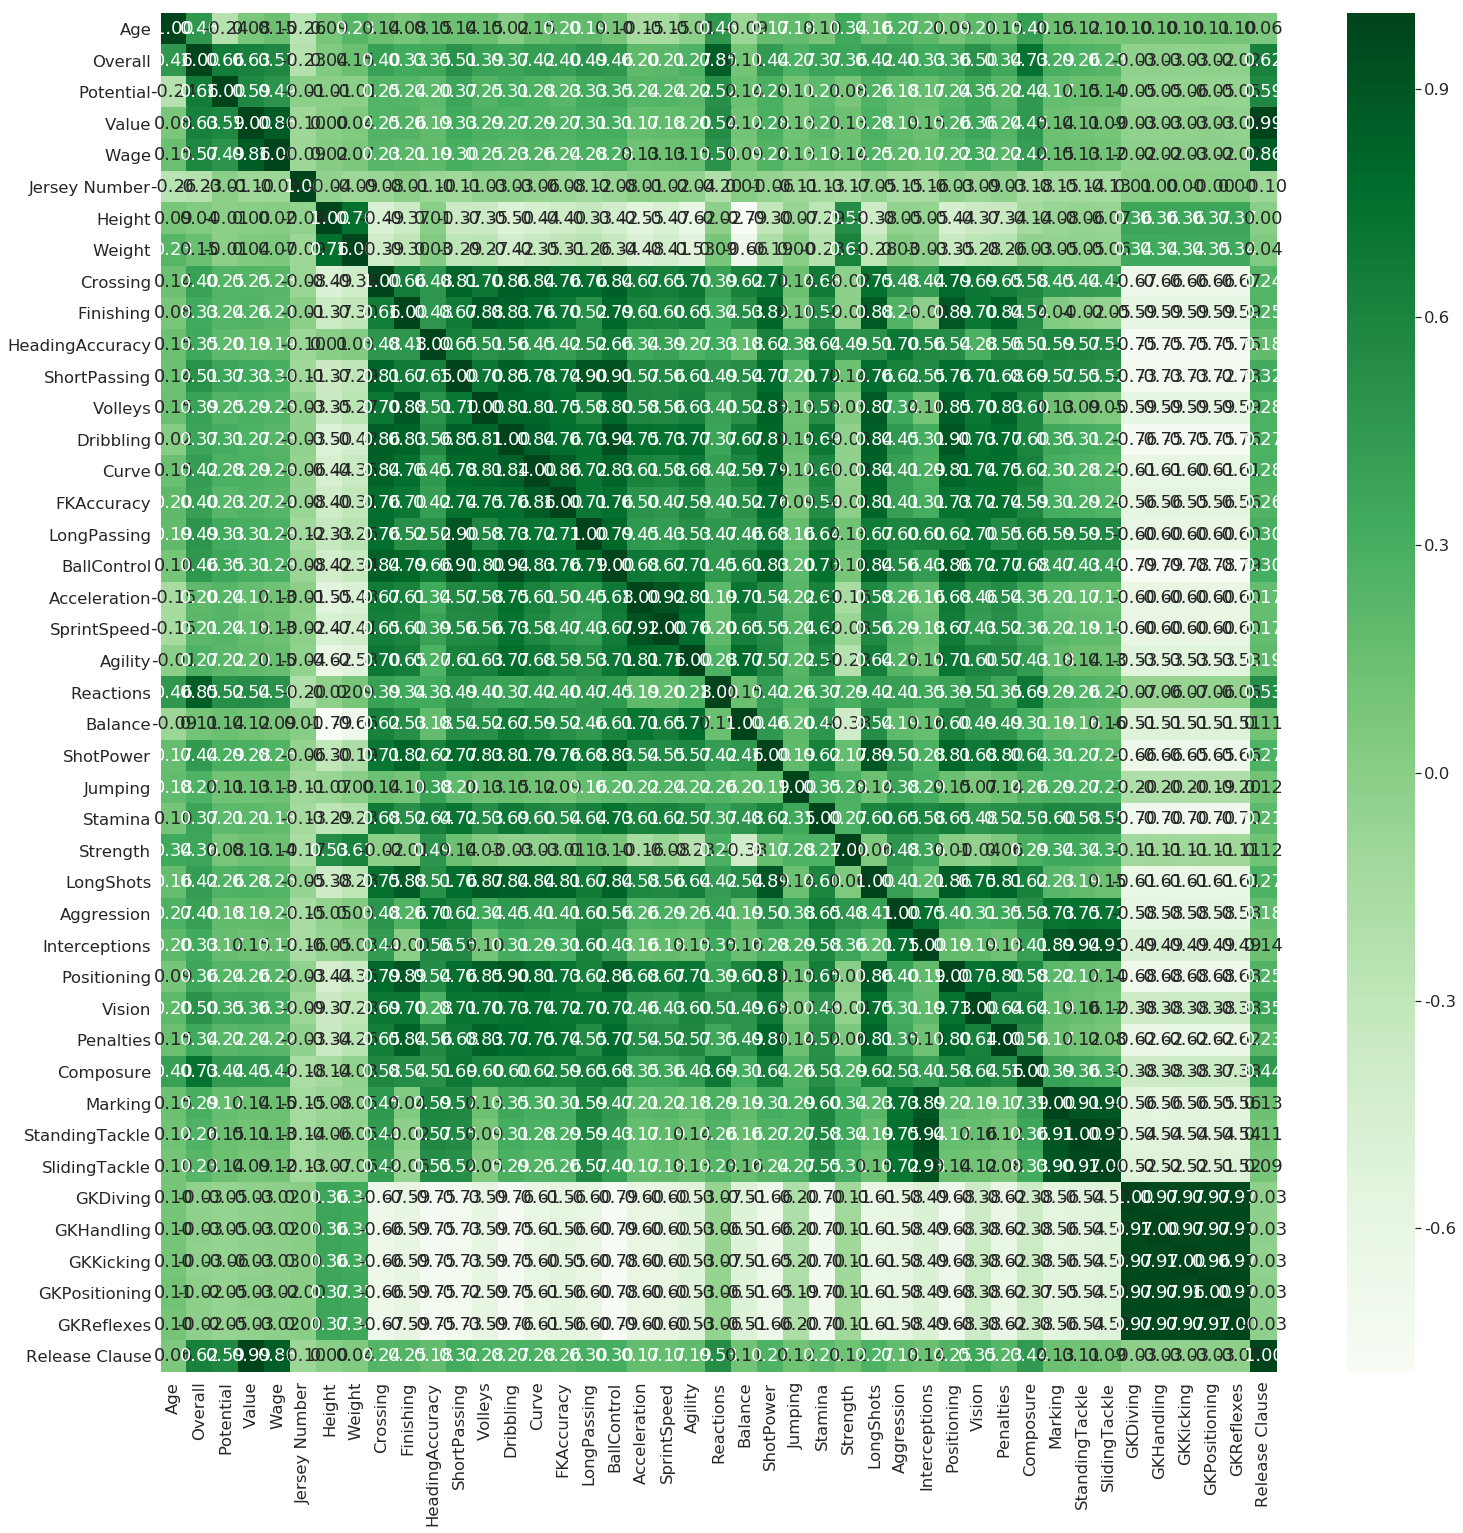

In [31]:
# data.corr() will calculate all the correlation between any two factors
plt.figure(figsize=(25, 25))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap=plt.cm.Greens)
plt.savefig("corr.png", dpi=100, bbox_inches="tight")

#### From above result, we can see Reaction and Composure skills have biggest effect on the overall ability

### How does age affect the overall ability of players?

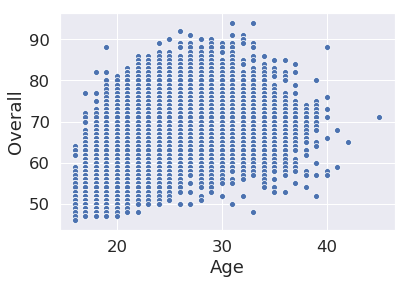

In [32]:
sns.scatterplot(x="Age", y="Overall", data=data)

In [33]:
# calculate the correlation between age and overall ability
data["Age"].corr(data["Overall"])

0.464977013927418

#### We can see the correlation is 0.46, still there are some relationship between age and overall ability,  maybe it is more resonable to divide age into 4 groups (10-20, 20-30, 30-40, more than 40), rather than to get scatter point at every age

In [35]:
# get the min and max of age
min_, max_ = data["Age"].min()-0.5, data["Age"].max()
# divided age into 4 groups
t = pd.cut(data["Age"], bins=[min_, 20, 30, 40, max_], labels=["Childhood", "Adolescence", "Adulthood", "Old Age"])
t = pd.concat((t, data["Overall"]), axis=1)

In [37]:
t.head()

,Age,Overall
0,Adulthood,94
1,Adulthood,94
2,Adolescence,92
3,Adolescence,91
4,Adolescence,91


In [38]:
g = t.groupby("Age")["Overall"].mean()
g

Age
Childhood      59.356556
Adolescence    67.311281
Adulthood      69.374342
Old Age        65.750000
Name: Overall, dtype: float64

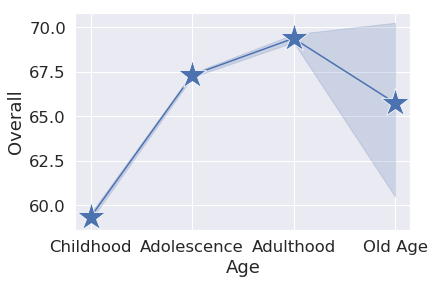

In [41]:
sns.lineplot(y="Overall", marker="*", ms=30, x="Age", data=t)